# Billboard EDA

Billboard is an American music and entertainment magazine published weekly by the Billboard-Hollywood Reporter Media Group, a division of MRC Media & Info. The magazine provides music charts, news, video, opinion, reviews, events, and style related to the music industry. Its music charts include the Hot 100, Billboard 200 and Global 200, tracking the most popular albums and songs in different genres of music. It also hosts events, owns a publishing firm, and operates several TV shows.

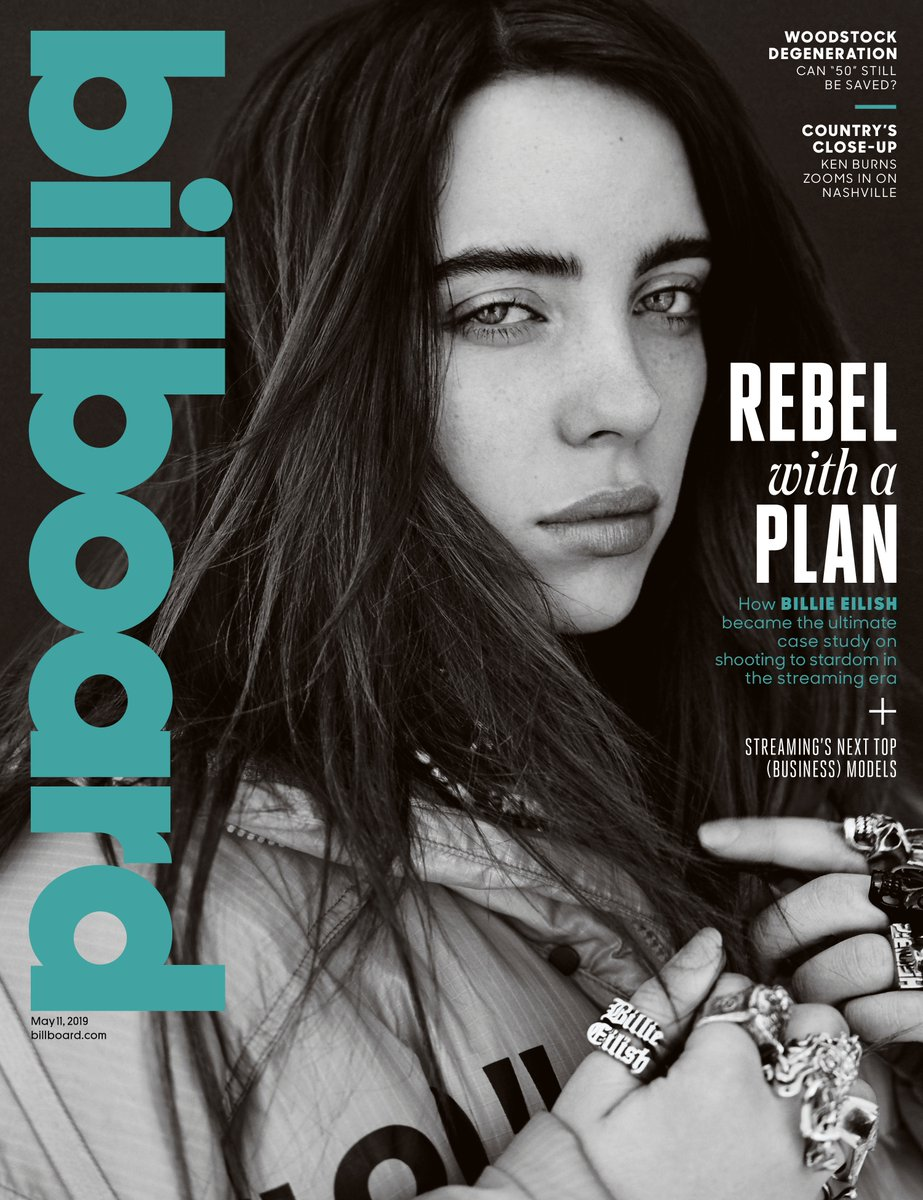

## Data cleaning

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import plotly
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df = pd.read_csv('../input/billboard-hot-100-full-history/billboard-hot-100-tracks.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329487 entries, 0 to 329486
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              329487 non-null  int64  
 1   rank            329487 non-null  int64  
 2   date            329487 non-null  object 
 3   artist          329487 non-null  object 
 4   song            329487 non-null  object 
 5   last_week       297266 non-null  float64
 6   weeks_on_chart  329487 non-null  int64  
 7   peak_rank       329487 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 20.1+ MB


In [4]:
df.describe()

,id,rank,last_week,weeks_on_chart,peak_rank
count,3.294870e+05,329487.000000,297266.000000,329487.000000,329487.000000
mean,4.784713e+05,50.500930,47.595016,9.158956,40.983808
std,2.897785e+05,28.866094,28.054934,7.613717,29.347770
min,1.100000e+01,1.000000,1.000000,1.000000,1.000000
25%,3.335420e+05,26.000000,23.000000,4.000000,14.000000
50%,5.251140e+05,51.000000,47.000000,7.000000,38.000000
75%,5.798350e+05,76.000000,72.000000,13.000000,65.000000
max,1.282528e+06,100.000000,100.000000,90.000000,100.000000


First five rows

In [5]:
df.head()

,id,rank,date,artist,song,last_week,weeks_on_chart,peak_rank
0,581724,1,1958-08-04,Ricky Nelson,Poor Little Fool,NaN,1,1
1,572037,2,1958-08-04,Perez Prado And His Orchestra,Patricia,NaN,1,2
2,577084,3,1958-08-04,Bobby Darin,Splish Splash,NaN,1,3
3,575171,4,1958-08-04,Elvis Presley With The Jordanaires,Hard Headed Woman,NaN,1,4
4,580391,5,1958-08-04,Kalin Twins,When,NaN,1,5


Last five rows

In [6]:
df.tail()

,id,rank,date,artist,song,last_week,weeks_on_chart,peak_rank
329482,1230320,96,2021-09-25,Justin Moore,We Didn't Have Much,81.0,13,41
329483,1271155,97,2021-09-25,Doja Cat,Ain't Shit,97.0,12,24
329484,1278099,98,2021-09-25,Elton John & Dua Lipa,Cold Heart (PNAU Remix),NaN,2,81
329485,1280199,99,2021-09-25,Kanye West,Jail,58.0,3,10
329486,1198053,100,2021-09-25,Kenny Chesney,Knowing You,NaN,5,87


Null values?

In [7]:
df.isnull().sum()

id                    0
rank                  0
date                  0
artist                0
song                  0
last_week         32221
weeks_on_chart        0
peak_rank             0
dtype: int64

This columns need to be inspect:
* last_week
* id
* rank
* weeks_on_chart
* peak_rank

**last week**

In [8]:
df['last_week'].value_counts()

5.0      3295
1.0      3293
2.0      3293
8.0      3293
6.0      3293
         ... 
96.0     1944
97.0     1757
98.0     1702
99.0     1538
100.0    1381
Name: last_week, Length: 100, dtype: int64

I'm going to drop column last week. It's won't be useful.

In [9]:
df.drop(columns='last_week', inplace=True)

**id**

In [10]:
df['id'].value_counts()

1179171    90
749034     87
665542     79
482874     76
50892      69
           ..
921336      1
395723      1
573989      1
578000      1
1282528     1
Name: id, Length: 29617, dtype: int64

This column also won't be useful anymore

In [11]:
df.drop(columns='id', inplace=True)

**rank**

In [12]:
df['rank'].value_counts()

81    3297
18    3297
50    3296
58    3296
30    3296
      ... 
82    3293
35    3293
49    3293
13    3292
19    3291
Name: rank, Length: 100, dtype: int64

This column is ok

In [13]:
df['weeks_on_chart'].value_counts()

1     29607
2     26998
3     25296
4     23876
5     22484
      ...  
82        2
81        2
88        1
89        1
90        1
Name: weeks_on_chart, Length: 90, dtype: int64

This one look's also quite good

**peak_rank**

In [14]:
df['peak_rank'].value_counts()

1      16774
2       7830
3       7024
4       6338
5       5874
       ...  
96      1674
97      1607
98      1533
99      1369
100     1216
Name: peak_rank, Length: 100, dtype: int64

This one also seems to be fine. Let's look at data after this basic cleaning

In [15]:
df.head()

,rank,date,artist,song,weeks_on_chart,peak_rank
0,1,1958-08-04,Ricky Nelson,Poor Little Fool,1,1
1,2,1958-08-04,Perez Prado And His Orchestra,Patricia,1,2
2,3,1958-08-04,Bobby Darin,Splish Splash,1,3
3,4,1958-08-04,Elvis Presley With The Jordanaires,Hard Headed Woman,1,4
4,5,1958-08-04,Kalin Twins,When,1,5


date column need to be converted to date type

In [16]:
df['date'] = pd.to_datetime(df['date'])

Let's make new column - **year**

In [17]:
df['year'] = df['date'].dt.year

In [18]:
df['year']

0         1958
1         1958
2         1958
3         1958
4         1958
          ... 
329482    2021
329483    2021
329484    2021
329485    2021
329486    2021
Name: year, Length: 329487, dtype: int64

**Month** column will be useful too

In [19]:
df['month'] = df['date'].dt.month

I'm going to extract decade as well

In [20]:
df['decade'] = df['year'].astype('str').str[2]

decade_map = {
    '5': '1950 - 1960',
    '6': '1960 - 1970',
    '7': '1970 - 1980',
    '8': '1980 - 1990',
    '9': '1990 - 1900',
    '0': '2000 - 2010',
    '1': '2010 - 2020',
    '2': '2020 - 2030'
}

df['decades'] = df['decade'].map(decade_map)

Finally, look at DataFrame

In [21]:
df.head()

,rank,date,artist,song,weeks_on_chart,peak_rank,year,month,decade,decades
0,1,1958-08-04,Ricky Nelson,Poor Little Fool,1,1,1958,8,5,1950 - 1960
1,2,1958-08-04,Perez Prado And His Orchestra,Patricia,1,2,1958,8,5,1950 - 1960
2,3,1958-08-04,Bobby Darin,Splish Splash,1,3,1958,8,5,1950 - 1960
3,4,1958-08-04,Elvis Presley With The Jordanaires,Hard Headed Woman,1,4,1958,8,5,1950 - 1960
4,5,1958-08-04,Kalin Twins,When,1,5,1958,8,5,1950 - 1960


Looks fine, i'm going to drop date colum and go further to data analysis and visualizations

In [22]:
df.drop(columns='date', inplace=True)

## Data  analysis and visualizations

Basicaly let's inspect which artists occures most frequent

In [23]:
grouped_by_artist = df['artist'].value_counts().head(10)[::-1]

In [24]:
fig = go.Figure()

fig.add_trace(go.Bar(y=grouped_by_artist.index, x=grouped_by_artist.values, 
                     marker_color = '#97023d',orientation='h'))

fig.update_layout(
    height=800, width=600, title_text='Artists frequency on Billboard magazine',
    xaxis_title='number of songs', yaxis_title='artist', title_x = 0.5,
    
    font=dict(
            family="Courier New, monospace",
            size=14,
            color="black")
)


fig.show()

3 artists with the biggest amount of songs are:

* Taylor Swift - 1022
* Elton John - 889
* Madonna - 857

In [25]:
from plotly.subplots import make_subplots

artists = ['Elton John', 'Taylor Swift', 'Madonna']

fig = make_subplots(rows=1, cols=3, shared_yaxes=True, 
                    subplot_titles=[artist for artist in artists])
row = 1
col = 1
for artist in artists:
    
    current_artist = df[df['artist'] == artist].groupby('year').count()['song']
    fig.add_trace(go.Bar(x=current_artist.index, y=current_artist.values, marker_color='#97023d'),
    row = row , col=col)
    
    col += 1

fig.update_layout(showlegend=False,title_text="TOP 3 BILLBOARD ARTISTS", title_x = 0.5,
                  yaxis_title="number of songs",
        font=dict(
            family="Courier New, monospace",
            size=18,
            color="black"
        
))

fig.show()

From 3 barcharts above we can see that:

* **Elton John** occurs in Billboard magazine since 1970, distributions of this occurences is quite regular with the best performance **in 1974 when 59 of his songs appeared in the Bilboard magazine**

* **Taylor Swift** and Billboard magazine started their adventure in **2006 when 15 of her songs occured, best performance of her was in 2009 with 122 songs**

* **Madonna** started in **1983 and had the best performance in 1985 with 83 of her songs**

I'm interested in one more thing. Which months was the best for each of them?

In [26]:
from plotly.subplots import make_subplots

artists = ['Elton John', 'Taylor Swift', 'Madonna']

fig = make_subplots(rows=1, cols=3, shared_yaxes=True, shared_xaxes=True,
                    subplot_titles=[artist for artist in artists])

col = 1
for artist in artists:
    
    current_artist = df[df['artist'] == artist].groupby('month').count()['song']
    fig.add_trace(go.Bar(x=current_artist.index, y=current_artist.values, marker_color='#97023d'),
    row = row , col=col)
    col += 1

    
fig.update_layout(showlegend=False,title_text="TOP 3 BILLBOARD ARTISTS", title_x = 0.5,
                  yaxis_title="number of songs",
  
        font=dict(
            family="Courier New, monospace",
            size=18,
            color="black"
        
))


fig.show()

Well, it's no clear patterns except April for Elton John, November seems to be the best time for Taylor

Last think I'm gonna do is to find top 3 artists for each decade

In [27]:
grouped_by_decades = df.groupby(['decades', 'artist']).count().sort_values(['decades','song'], ascending = [True, False]).reset_index()

In [28]:
decades = grouped_by_decades.decades.unique()
data_frame = pd.DataFrame()
for decade in decades:
    data_frame = data_frame.append(grouped_by_decades[grouped_by_decades['decades'] == decade][:3])
decade_df = data_frame.reset_index().drop(columns='index')[['decades','artist','song']]
decade_df

,decades,artist,song
0,1950 - 1960,Connie Francis,114
1,1950 - 1960,Ricky Nelson,110
2,1950 - 1960,Pat Boone,109
3,1960 - 1970,The Beatles,478
4,1960 - 1970,Brenda Lee,408
5,1960 - 1970,Elvis Presley With The Jordanaires,392
6,1970 - 1980,Bee Gees,333
7,1970 - 1980,Chicago,310
8,1970 - 1980,Elton John,297
9,1980 - 1990,Daryl Hall John Oates,363


In [29]:
fig = px.bar(decade_df, x='decades', y='song', color='artist',
            color_discrete_sequence= ['#f8432d','#d90d39','#97023d'])


fig.update_layout(
    
    height=800, width=600, title_text='Top 3 artists per decade - Billboard magazine',
    xaxis_title='decades', yaxis_title='number of the songs', showlegend=False, title_x = 0.5,
    
    font=dict(
            family="Courier New, monospace",
            size=16,
            color="black"
        
))

fig.show()